## Δένδρα απόφασης ##

Χρήση του συνόλου δεδομένων iris

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

print(iris.target_names)
pd.DataFrame(iris.data, columns=iris.feature_names).describe()

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Συνάρτηση οπτικοποίησης δένδρου

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import call

def display_tree(tree, features, classes, dpi):
    # δημιουργία εικόνας σε μορφή dot
    export_graphviz(
        tree,
        out_file="temp.dot",
        feature_names=features,
        class_names=classes,
        rounded=True,
        filled=True
    )

    # Μετατροπή σε png με κλήση εντολής συστήματος (απαιτεί Graphviz)
    call(['dot', '-Tpng', 'temp.dot', '-o', 'temp.png', '-Gdpi=' + str(dpi)])

    # εμφάνιση
    return Image(filename = 'temp.png')

Εκπαίδευση και οπτικοποίηση δένδρου απόφασης στο σύνολο δεδομένων iris

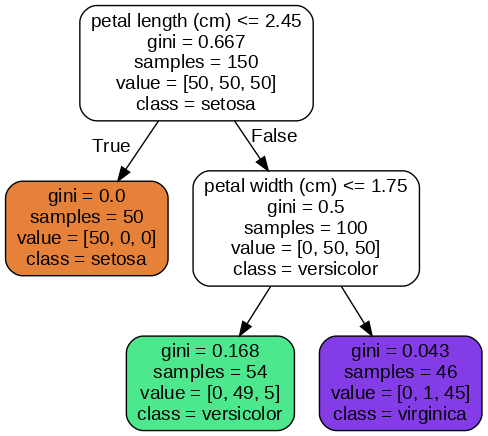

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2, random_state=42)
tree.fit(iris.data, iris.target)

display_tree(tree, iris.feature_names, iris.target_names, 100)

Χρήση δένδρου για προβλέψεις

In [ ]:
pd.DataFrame(iris.data, columns=iris.feature_names).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
x = [5.84, 3.06, 3.76, 1.19]
predictions = tree.predict([x])
y_pred = predictions[0]
print(y_pred)
print(iris.target_names[y_pred])

1
versicolor


In [ ]:
print(iris.target_names)
probabilities = tree.predict_proba([x])
print(probabilities[0])

['setosa' 'versicolor' 'virginica']
[0.         0.90740741 0.09259259]


Πρόβλεψη με ελλιπείς τιμές

In [ ]:
# ο τρόπος χειρισμού των ελλιπών τιμών κατά την πρόβλεψη δεν συμφωνεί με τη θεωρία του C4.5
# βλέπε https://scikit-learn.org/stable/modules/tree.html#missing-values-support
import numpy as np
x = [np.nan, np.nan, np.nan, np.nan]
predictions = tree.predict([x])
y_pred = predictions[0]
print(y_pred)
print(iris.target_names[y_pred])
print(iris.target_names)
probabilities = tree.predict_proba([x])
print(probabilities[0])

1
versicolor
['setosa' 'versicolor' 'virginica']
[0.         0.90740741 0.09259259]


Συνάρτηση αναπαράστασης του διαχωρισμού του χώρου παράλληλα με τους άξονες που μαθαίνουν τα δενδρικά μοντέλα

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, colors, markers, target_names, axes=[0, 7.5, 0, 3], legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 1000)
    x2s = np.linspace(axes[2], axes[3], 1000)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    plt.axis(axes)
    custom_cmap = ListedColormap(colors)
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    #custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    #plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.xlabel(r"$x_1$", fontsize=14)
    plt.ylabel(r"$x_2$", fontsize=14, rotation=0)
    if plot_training:
      for v in range(len(colors)):
        plt.plot(X[:, 0][y==v], X[:, 1][y==v], color = colors[v], marker=markers[v], linestyle="None", label=target_names[v])
    if legend:
        plt.legend(loc="lower right", fontsize=14)

Αναπαράσταση του χώρου ενός δένδρου για υποσύνολο του iris με τα πέταλα μόνο.

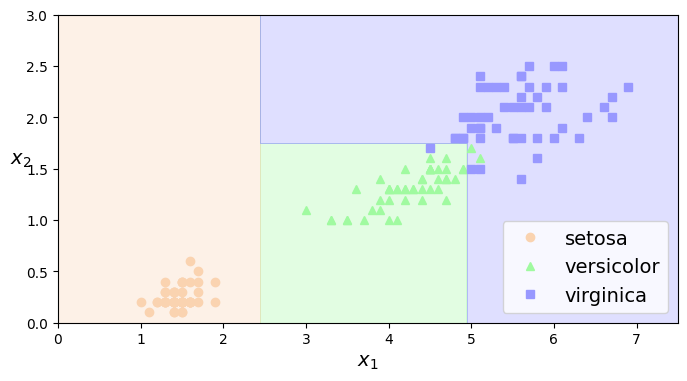

In [ ]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(iris.data[:,2:4], iris.target)
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree, iris.data[:,2:4], iris.target, ['#fad3b0','#a0faa0','#9898ff'], ['o', '^', 's'], iris.target_names, legend=True)

## Δένδρα παλινδρόμησης ##

Παραβολή με θόρυβο

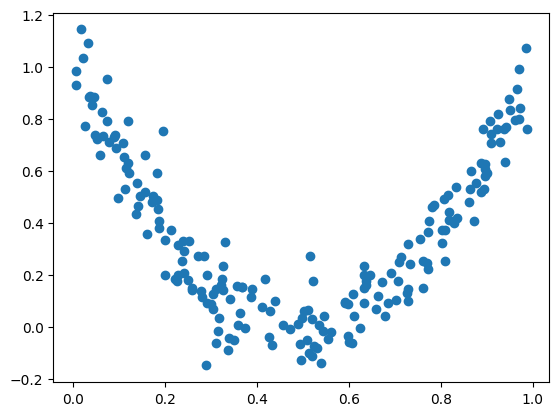

In [ ]:
np.random.seed(42)

m = 200
X = np.random.rand(m, 1) #τυχαίοι αριθμοί από 0 ως 1
y = 4 * (X - 0.5) ** 2 # παραβολή
y = y + np.random.randn(m, 1) / 10 # προσθήκη θορύβου

plt.scatter(X,y)

Εκπαίδευση και εμφάνιση δένδρου παλινδρόμησης

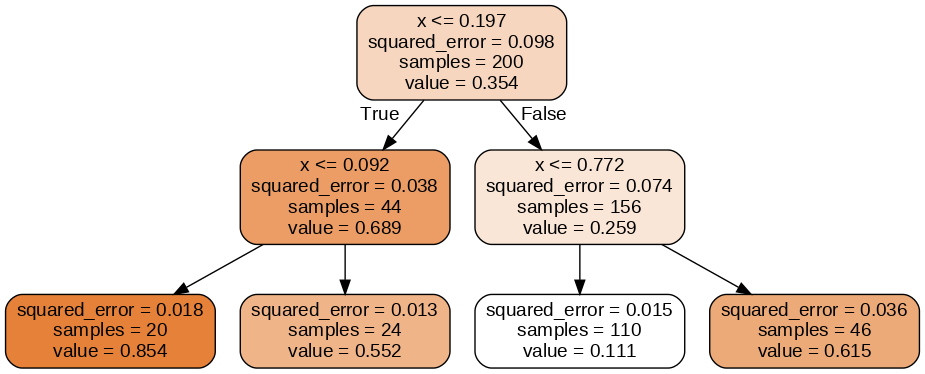

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=2, random_state=42)
tree.fit(X, y)

display_tree(tree, ["x"], None, 100)

Εκπαίδευση και εμφάνιση προβλέψεων στα φύλλα

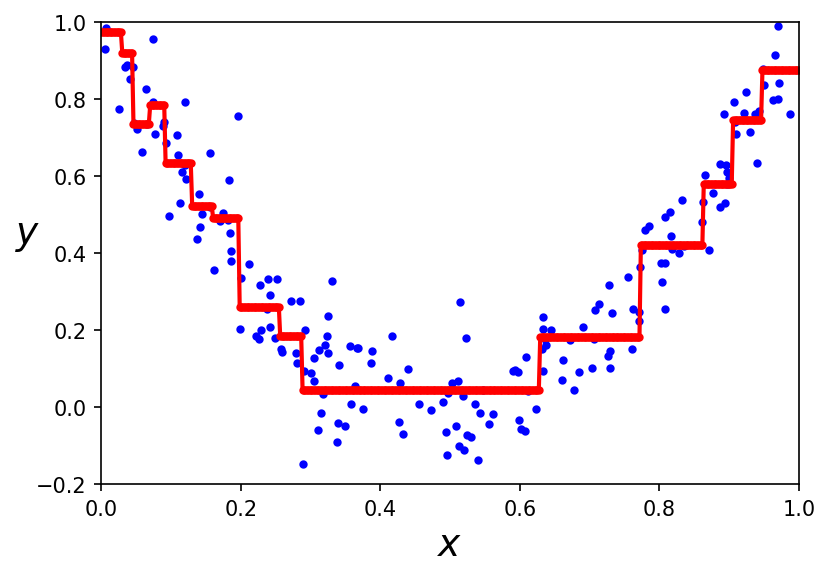

In [ ]:
from sklearn.tree import DecisionTreeRegressor

def plot_regression_predictions(tree, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")


plt.figure(figsize=(6, 4), dpi=150)
tree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=42)
tree.fit(X, y)
plot_regression_predictions(tree, X, y)

Πρόβλεψη για νέα είσοδο

In [ ]:
x = [0.4]
predictions = tree.predict([x])
y_pred = predictions[0]
print(round(y_pred,2))

0.04


## Αντιμετώπιση υπερπροσαρμογής ##

### Ταξινόμηση ###

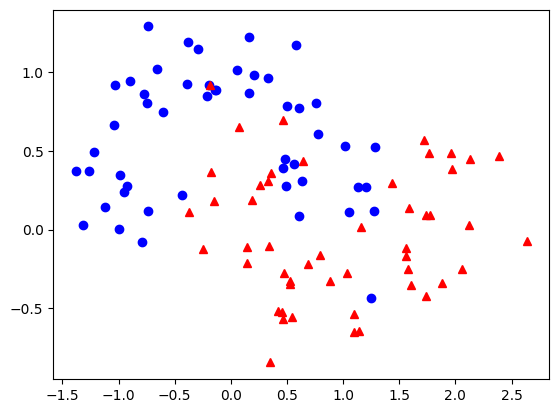

In [ ]:
# Τα δίδυμα φεγγάρια
from sklearn.datasets import make_moons

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

plt.plot(Xm[:, 0][ym==0], Xm[:, 1][ym==0], "bo")
plt.plot(Xm[:, 0][ym==1], Xm[:, 1][ym==1], "r^")

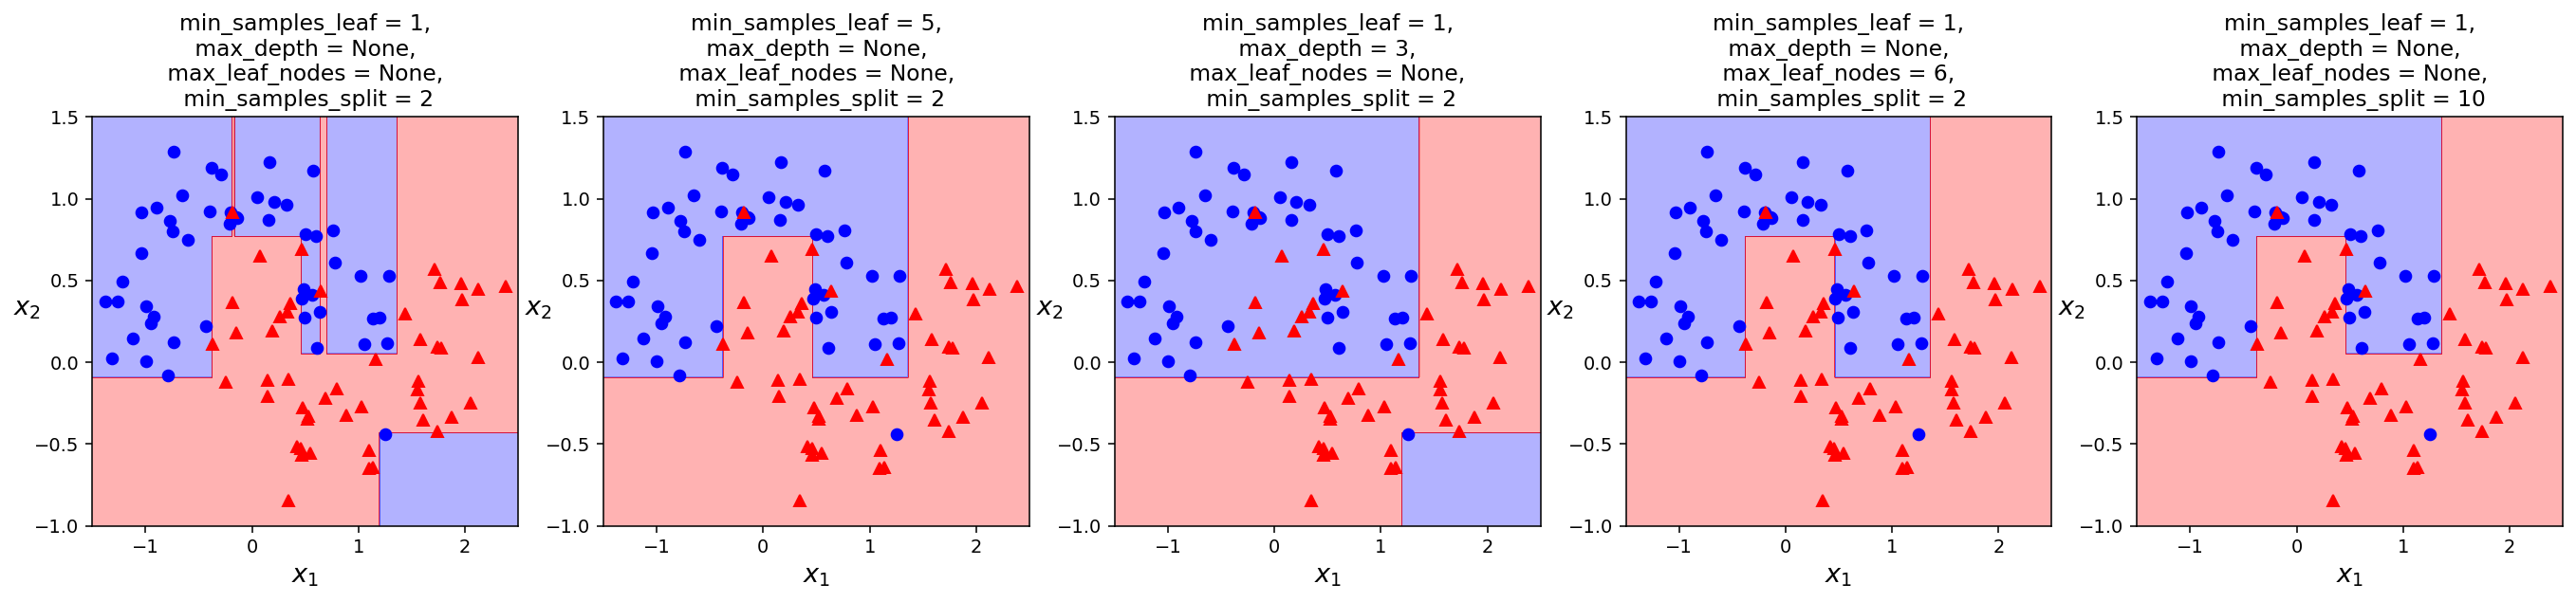

In [ ]:
trees = []
trees.append(DecisionTreeClassifier(random_state=42))
trees.append(DecisionTreeClassifier(min_samples_leaf=5, random_state=42))
trees.append(DecisionTreeClassifier(max_depth=3, random_state=42))
trees.append(DecisionTreeClassifier(max_leaf_nodes=6, random_state=42))
trees.append(DecisionTreeClassifier(min_samples_split=10, random_state=42))

for i in range(len(trees)):
  trees[i].fit(Xm, ym)

plt.figure(figsize=(24, 4), dpi=140)
for i in range(len(trees)):
  plt.subplot(151+i)
  plot_decision_boundary(trees[i], Xm, ym, ['blue', 'red'], ['o', '^'], ["blue circles", "red triangles"], axes=[-1.5, 2.5, -1, 1.5])
  plt.title("min_samples_leaf = {},\n max_depth = {}, \n max_leaf_nodes = {}, \n min_samples_split = {}".format(trees[i].min_samples_leaf, trees[i].max_depth, trees[i].max_leaf_nodes, trees[i].min_samples_split) , fontsize=12)


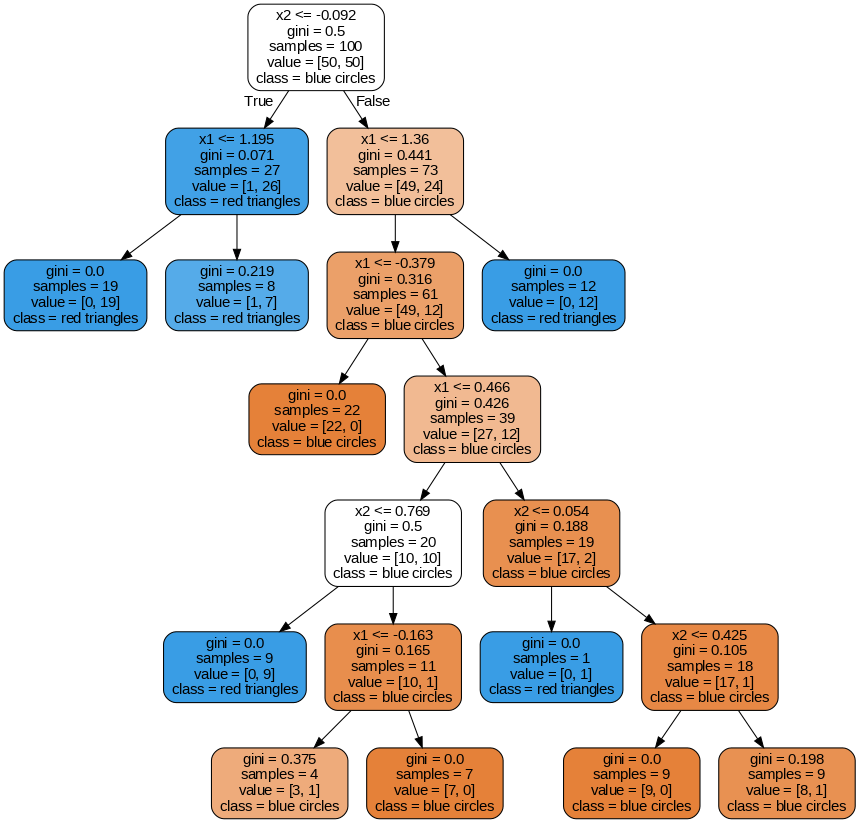

In [ ]:
display_tree(trees[4], ["x1", "x2"],["blue circles", "red triangles"], 75)

### Παλινδρόμηση ###

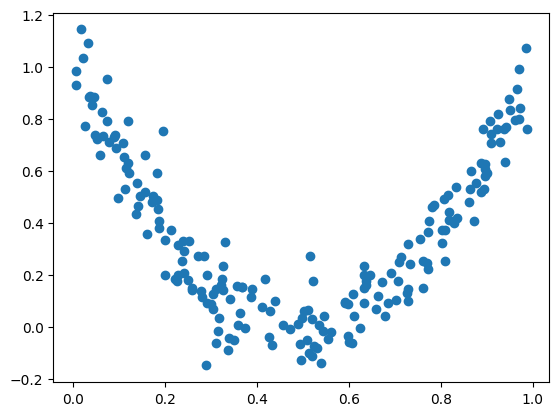

In [ ]:
# Παραβολή με θόρυβο
np.random.seed(42)

m = 200
X = np.random.rand(m, 1) #τυχαίοι αριθμοί από 0 ως 1
y = 4 * (X - 0.5) ** 2 # παραβολή
y = y + np.random.randn(m, 1) / 10 # προσθήκη θορύβου

plt.scatter(X,y)

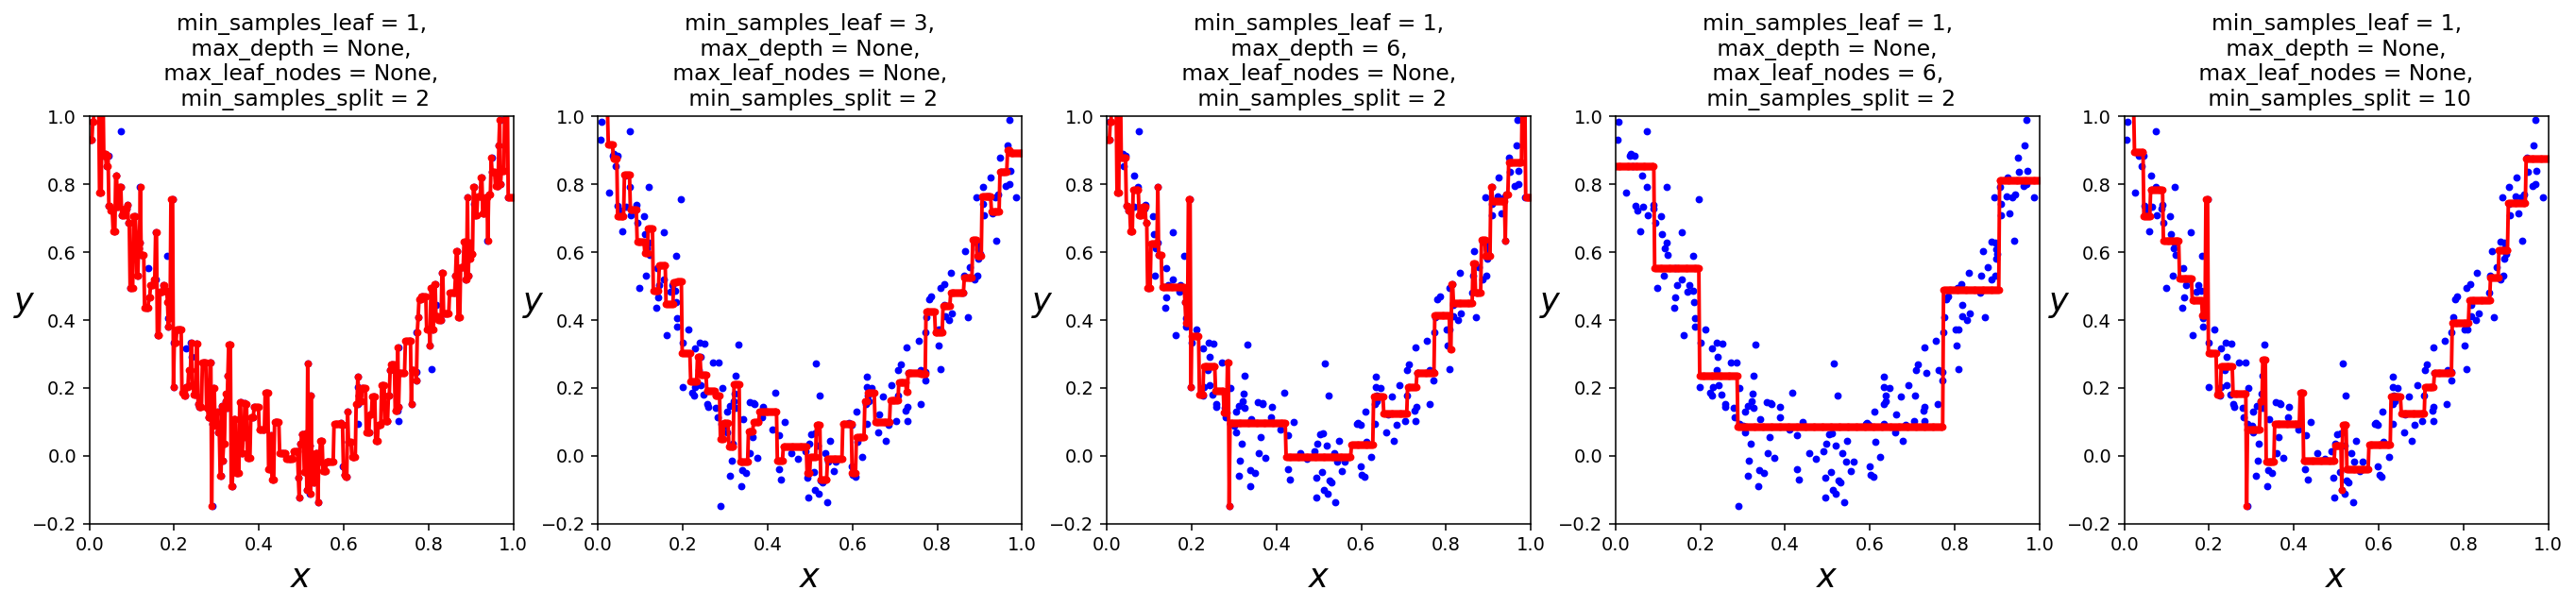

In [ ]:
trees = []
trees.append(DecisionTreeRegressor(random_state=42))
trees.append(DecisionTreeRegressor(min_samples_leaf=3, random_state=42))
trees.append(DecisionTreeRegressor(max_depth=6, random_state=42))
trees.append(DecisionTreeRegressor(max_leaf_nodes=6, random_state=42))
trees.append(DecisionTreeRegressor(min_samples_split=10, random_state=42))

for i in range(len(trees)):
  trees[i].fit(X, y)

plt.figure(figsize=(24, 4), dpi=140)
for i in range(len(trees)):
  plt.subplot(151+i)
  plot_regression_predictions(trees[i], X, y)
  plt.title("min_samples_leaf = {},\n max_depth = {}, \n max_leaf_nodes = {}, \n min_samples_split = {}".format(trees[i].min_samples_leaf, trees[i].max_depth, trees[i].max_leaf_nodes, trees[i].min_samples_split) , fontsize=12)


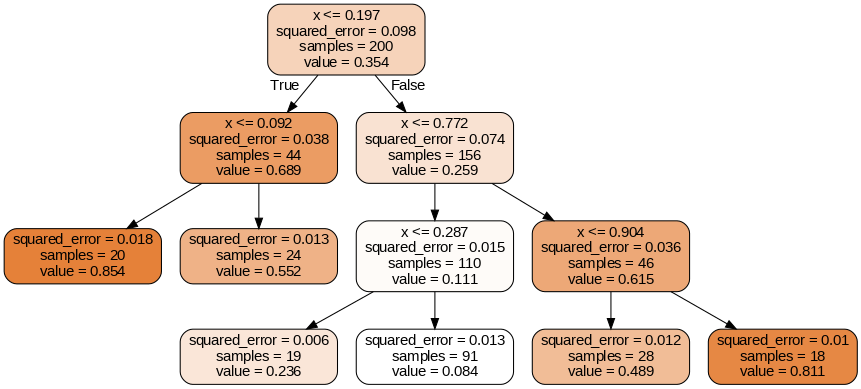

In [ ]:
display_tree(trees[3], ["x"], None, 75)

Εμφανίστε το πρώτο δένδρο και παρατηρήστε την πολυπλοκότητα του

## Ερμηνευσιμότητα ##

In [ ]:
tree = DecisionTreeClassifier(max_depth=2, random_state=42)
tree.fit(iris.data, iris.target)

DecisionTreeClassifier(max_depth=2, random_state=42)

### Μέσω οπτικοποίησης δένδρου ###

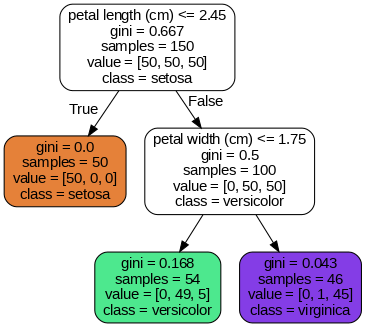

In [ ]:
display_tree(tree, iris.feature_names, iris.target_names, 75)

Πόσο ερμηνεύσιμο είναι το πρώτο δένδρο παλινδρόμησης από την προηγούμενη ενότητα;

### Μέσω σημαντικότητας χαρακτηριστικών ###

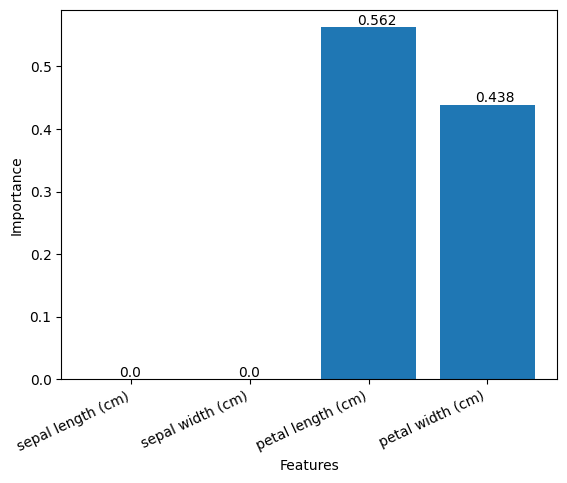

In [ ]:
bars = plt.bar(iris.feature_names, tree.feature_importances_)
plt.xticks(rotation=25, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval, round(yval, 3), va='bottom')

plt.xlabel('Features')
plt.ylabel('Importance')

# Display the plot
plt.show()
